# 🎬✨ Netflix Data Case Study 📊🔍

![Netflix Recommendation Engine](https://static.startuptalky.com/2021/12/Netflix-Recommendation-Engine-Working-StartupTalky.jpg)

## 📁 1. Dataset Overview 📄

### Libraries import 

In [3]:
import pandas as pd
import numpy as np

### Import of dataset

In [4]:
url = "https://raw.githubusercontent.com/neerajcodes888/Data-Science/main/Case%20Study/Netflix%20Case%20Study/netflix.csv"
data = pd.read_csv(url)

In [5]:
data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### What is the shape of the dataset?

In [6]:
data.shape

(8807, 12)

###  What are the types of columns and their missing values?

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
data.isnull()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,True,True,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

### How many unique titles exist?

In [10]:
data['title'].unique()

array(['Dick Johnson Is Dead', 'Blood & Water', 'Ganglands', ...,
       'Zombieland', 'Zoom', 'Zubaan'], shape=(8807,), dtype=object)

### What is the overall distribution of content type (Movie vs TV Show)?

In [11]:
data['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [12]:
cat = data['type'].value_counts(normalize=True)*100

In [13]:
cat

type
Movie      69.615079
TV Show    30.384921
Name: proportion, dtype: float64

In [14]:
round(cat,2)
cat = round(cat,2)

#### Clearly can be seen , here movies shows are more available than TV shows

### Let's visualize for more clarity

In [15]:
import matplotlib.pyplot as plt

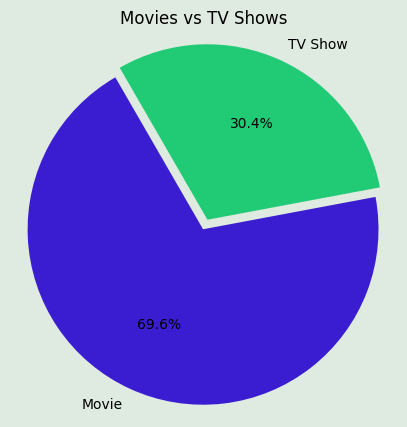

In [16]:
plt.figure(figsize=(5,5),facecolor="#CDDECF9F")
plt.pie(cat, labels=cat.index, autopct='%1.1f%%', startangle=120 ,colors=["#3b1dd1","#21cb76"], explode=(0.04, 0.02))
plt.title("Movies vs TV Shows")
plt.axis("equal")
plt.savefig('MVT.png')
plt.show()

##  🧹 2. Data Cleaning & Feature Engineering

#### - How many missing values are there in `director`, `cast`, `country`?|

In [17]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [18]:
data.dropna().head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [19]:
data.dropna(inplace=True)

In [20]:
data.shape

(5332, 12)

In [21]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

#### - Can we extract `month` and `year` from `date_added`?

In [22]:
data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [23]:
date_converted = pd.to_datetime(data['date_added'].str.strip())


##### Making Sure there is no trailing space like 'September 24, 2021' . here after September space and then 24, space 2021. That's why str.strip used to avoid spaces.

In [24]:
date_converted

7      2021-09-24
8      2021-09-24
9      2021-09-24
12     2021-09-23
24     2021-09-21
          ...    
8801   2016-03-09
8802   2019-11-20
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 5332, dtype: datetime64[ns]

#### - Now the questions ---  Can we extract `month` and `year` from `date_added`? 
####  _ yes, we can create

In [25]:
data['Month'] = date_converted.dt.month

In [26]:
data['Year'] = date_converted.dt.year

In [27]:
dd = date_converted.dt.day

In [28]:
data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Month,Year
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",9,2021
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,9,2021


### - Converting duration to numeric (e.g., minutes or seasons)

In [29]:
data['duration'].dtype

dtype('O')

In [30]:
def convert_duration(dur):
    dur = str(dur).lower().strip()
    if 'min' in dur:
        return int(dur.split()[0])
    elif 'season' in dur:
        return int(dur.split()[0])*40
    else:
        return None
    

In [31]:
data['duration'] = data['duration'].apply(convert_duration) 

In [32]:
data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Month,Year
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",9,2021
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,360,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,9,2021


#### How has Netflix content changed over the years?

In [47]:
content_years=data.groupby('Year')['show_id'].count().sort_values(ascending=False)

In [48]:
content_years

Year
2019    1265
2020    1194
2018    1101
2021     755
2017     724
2016     202
2015      50
2014      14
2011      13
2013       7
2012       3
2009       2
2010       1
2008       1
Name: show_id, dtype: int64

In [50]:
content_years.sort_index()

Year
2008       1
2009       2
2010       1
2011      13
2012       3
2013       7
2014      14
2015      50
2016     202
2017     724
2018    1101
2019    1265
2020    1194
2021     755
Name: show_id, dtype: int64

#### Let's plot for this!!!

In [44]:
plt.figure(figsize=(6,6))

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

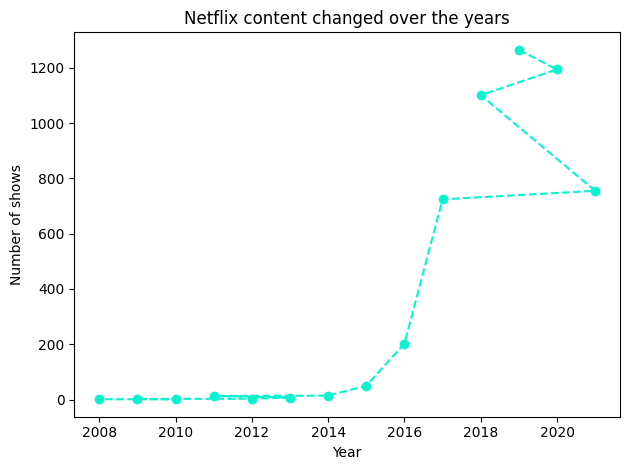

In [64]:
plt.plot(content_years.index, content_years.values, marker='o', linestyle='--',color="#09F3D0")
plt.title("Netflix content changed over the years")
plt.xlabel("Year")
plt.ylabel("Number of shows")
plt.tight_layout()